# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [7]:
### Student Name: Ayman Al Shoukari

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [11]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [13]:
data1 = pd.read_csv("genes_id.txt",sep=" ",header=None)
print (data1.head())

data2= pd.read_csv("patient_subtype.txt", header=None)
print (data2.head())

data3=pd.read_csv("patient_expression.txt", sep=" ", header=None)
print (data3.head())


                    0
0   ENSG00000011426.9
1   ENSG00000054598.6
2  ENSG00000062038.12
3   ENSG00000077152.8
4  ENSG00000082175.13
       0
0  Basal
1  Basal
2  Basal
3  Basal
4  Basal
         0         1         2         3         4         5         6   \
0  1.326515  3.475678  2.374959  3.409941  0.014148  3.235387  0.094595   
1  1.885133  2.752910  3.770004  3.822052  0.051402  3.001023  0.241303   
2  3.246316  4.423018  3.700385  4.369893  0.155187  3.752491  0.102125   
3  2.161512  2.314358  3.562899  3.786747  0.039245  4.227823  0.493791   
4  2.795468  1.876752  0.658127  2.581386  0.014486  2.688765  0.432283   

         7         8         9   ...        37        38        39        40  \
0  4.488874  2.023978  3.996567  ...  0.415417  3.163366  1.751804  1.727270   
1  3.680198  1.820556  1.344271  ...  2.035764  2.339897  0.949565  1.967062   
2  3.779098  2.218593  1.927426  ...  1.123048  3.647681  1.063245  2.876544   
3  4.124650  2.202475  2.317170  ...  0.930

### How many patient are you considering? [1 pt]

In [14]:
print(data2.shape)
print("645 patients")

(645, 1)
645 patients


### How many genes are you considering? [1 pt]

In [15]:
print(data3.shape)
print ("47 genes")

(645, 47)
47 genes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [16]:
df=data3.copy()
df.columns=data1[0]
df.loc[:,"Clinical_Subtypes"]= data2.iloc[:,0]
df.head()



,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical_Subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [17]:
#Apply Unique on subtypes to extract them
print("Subtypes:",df.loc[:,'Clinical_Subtypes'].unique())

Subtypes: ['Basal' 'LumA' 'LumB' 'Her2' 'Normal']


### How many patients are associtated to each subtype? [2 pts]

In [18]:
#Apply count on each subtype
print(df.loc[df["Clinical_Subtypes"] == "Basal", "Clinical_Subtypes"].count(),"Basal Subtype")
print(df.loc[df["Clinical_Subtypes"] == "LumA", "Clinical_Subtypes"].count(),"LumA")
print(df.loc[df["Clinical_Subtypes"] == "LumB", "Clinical_Subtypes"].count(),"LumB")
print(df.loc[df["Clinical_Subtypes"] == "Her2", "Clinical_Subtypes"].count(),"Her2")
print(df.loc[df["Clinical_Subtypes"] == "Normal", "Clinical_Subtypes"].count(),"Normal")

191 Basal Subtype
179 LumA
165 LumB
82 Her2
28 Normal


### df_means = pd.DataFrame(z, columns=['Mean Value']).reset_index()
df_means.columns = ['Identifier', 'Mean Value'][5 pts]

In [19]:
#Calculate average expression of each gene
ds=data3
ds.columns=data1[0]
z=ds.mean(axis=0)
df_means = pd.DataFrame(z, columns=['Mean Value']).reset_index()
df_means.columns = ['Identifier', 'Mean Value']

df_means


,Identifier,Mean Value
0,ENSG00000011426.9,2.164062
1,ENSG00000054598.6,1.535686
2,ENSG00000062038.12,2.102870
3,ENSG00000077152.8,3.132112
4,ENSG00000082175.13,1.179845
5,ENSG00000089685.13,2.554557
6,ENSG00000091831.20,2.491631
7,ENSG00000092621.10,2.452480
8,ENSG00000094804.8,1.803410
9,ENSG00000099953.8,3.506780


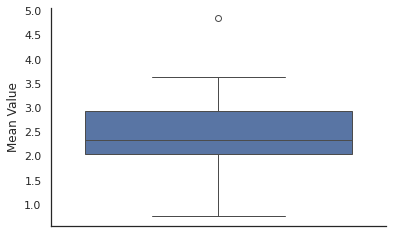

In [10]:
#generate a boxplot
sns.boxplot(data=df_means, y="Mean Value")
sns.despine()

sns.despine()



<Axes: xlabel='Mean Value', ylabel='Count'>

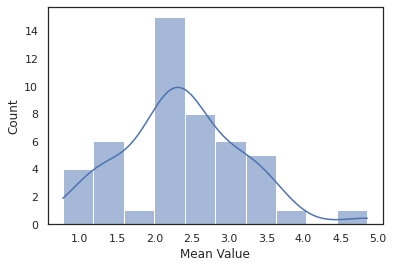

In [11]:
#generate a histoplot (better representation)
sns.histplot(df_means['Mean Value'], bins=10, kde=True)

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [87]:

# Compute the standard deviation for each gene
std_devs = df.iloc[:, 0:47].std()

# Sort the genes by standard deviation in descending order
sorted_std_devs = std_devs.sort_values(ascending=False)
sorted_std_devs

print("ENSG00000186081.10 and ENSG00000128422.14","has the largest S.D")
print (sorted_std_devs)

ENSG00000186081.10 and ENSG00000128422.14 has the largest S.D
0
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
ENSG00000186847.5     1.878563
ENSG00000091831.20    1.798359
ENSG00000104332.10    1.788465
ENSG00000129514.5     1.752245
ENSG00000171428.12    1.673947
ENSG00000115648.12    1.445019
ENSG00000141424.11    1.352087
ENSG00000082175.13    1.332091
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000099953.8     1.197679
ENSG00000261857.5     1.152220
ENSG00000092621.10    1.145830
ENSG00000186868.14    1.115846
ENSG00000141736.12    1.110351
ENSG00000101057.14    1.080362
ENSG00000171791.11    0.977252
ENSG00000141738.12    0.962185
ENSG00000151715.6     0.961420
ENSG00000146648.14    0.950554
ENSG00000175063.15    0.949751
ENSG00000160867.13    0.932651
ENSG00000117399.12    0.930666
ENSG00000136997.13    0.908470
ENSG00000173890.15    0.878594
ENSG00000105173.12    0.858695
ENSG00000089685.13    0.854562
ENSG00000171604.10    0.809525
ENSG00

### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

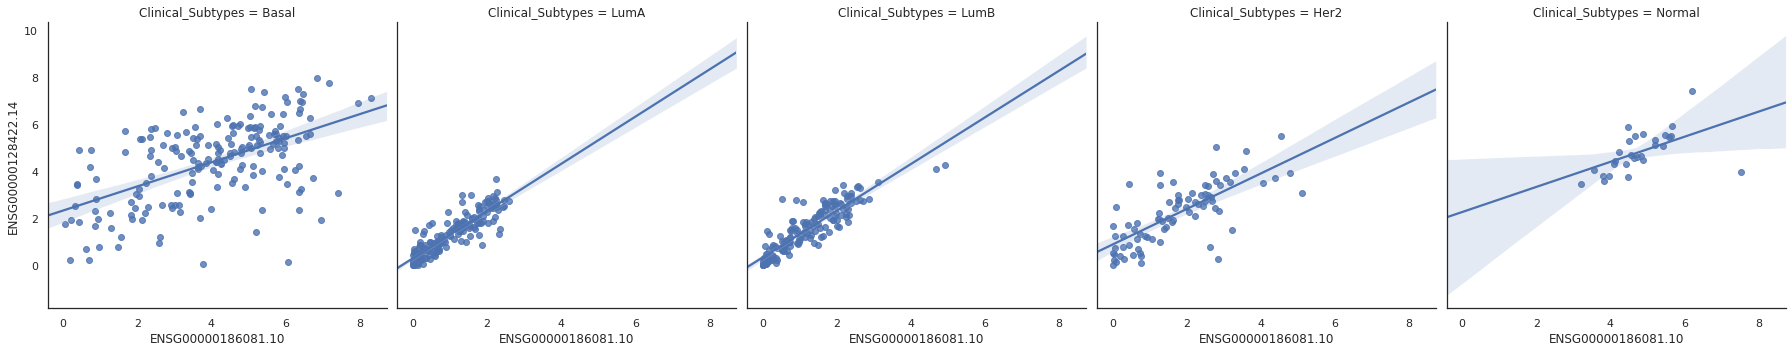

In [36]:
#create dataframe using patients rows, the genes of interests and Clinical subtypes
o=df.loc[:,["ENSG00000186081.10","ENSG00000128422.14","Clinical_Subtypes"]]

sns.lmplot(data=o, x="ENSG00000186081.10", y="ENSG00000128422.14", truncate=False,col="Clinical_Subtypes")
sns.despine()

Axes(0.125,0.125;0.775x0.755)
R Value= 0.5544196989003722


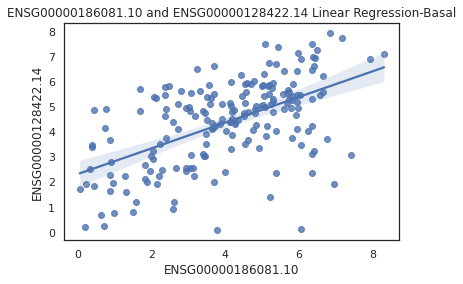

In [39]:
#Filter on each sybtype
#"Basal' 'LumA' 'LumB' 'Her2' 'Normal"

#filter based on results: Basal
datasubset_Results1 = o.loc[o["Clinical_Subtypes"] == "Basal"]

x = datasubset_Results1['ENSG00000186081.10']
y = datasubset_Results1['ENSG00000128422.14']

o1= sp.stats.linregress(x, y,alternative="two-sided")
o1.rvalue
o1B= sns.regplot(datasubset_Results1, x="ENSG00000186081.10",y="ENSG00000128422.14")
o1B.set_title("ENSG00000186081.10 and ENSG00000128422.14 Linear Regression-Basal")
print(o1B)
print("R Value=",o1.rvalue)

Axes(0.125,0.125;0.775x0.755)
R Value= 0.8914287604819622


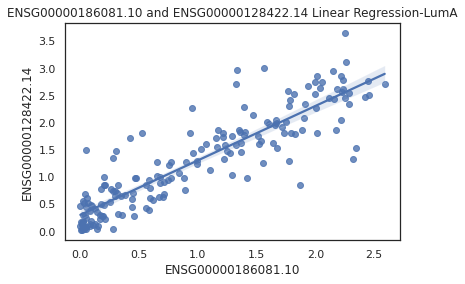

In [40]:

#filter based on results: LumA
datasubset_Results2 = o.loc[o["Clinical_Subtypes"] == "LumA"]

x = datasubset_Results2['ENSG00000186081.10']
y = datasubset_Results2['ENSG00000128422.14']

o2= sp.stats.linregress(x, y,alternative="two-sided")
o2.rvalue
o2B= sns.regplot(datasubset_Results2, x="ENSG00000186081.10",y="ENSG00000128422.14")
o2B.set_title("ENSG00000186081.10 and ENSG00000128422.14 Linear Regression-LumA")
print(o2B)
print("R Value=",o2.rvalue)

Axes(0.125,0.125;0.775x0.755)
R Value= 0.8974230320693612


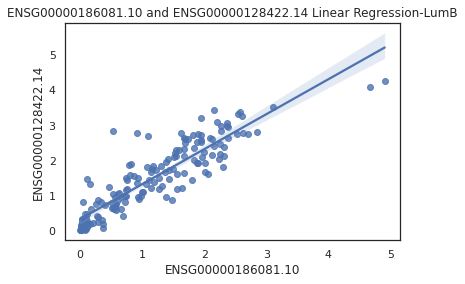

In [41]:

#filter based on results: LumB
datasubset_Results3 = o.loc[o["Clinical_Subtypes"] == "LumB"]

#select the columns
x = datasubset_Results3['ENSG00000186081.10']
y = datasubset_Results3['ENSG00000128422.14']

#Perform linear regression analysis and plot graph
o3= sp.stats.linregress(x, y,alternative="two-sided")
o3.rvalue
o3B= sns.regplot(datasubset_Results3, x="ENSG00000186081.10",y="ENSG00000128422.14")
o3B.set_title("ENSG00000186081.10 and ENSG00000128422.14 Linear Regression-LumB")
print(o3B)
print("R Value=",o3.rvalue)

Axes(0.125,0.125;0.775x0.755)
R Value= 0.7362528192401565


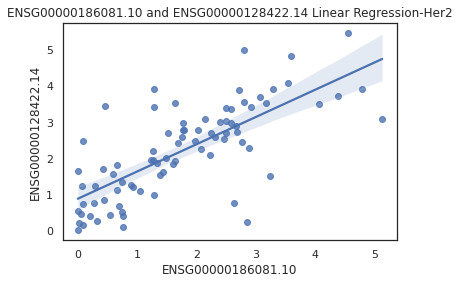

In [42]:
#filter based on results: HER2
datasubset_Results4 = o.loc[o["Clinical_Subtypes"] == "Her2"]

#select the columns
x = datasubset_Results4['ENSG00000186081.10']
y = datasubset_Results4['ENSG00000128422.14']

#Perform linear regression analysis and plot graph
o4= sp.stats.linregress(x, y,alternative="two-sided")
o4.rvalue
o4B= sns.regplot(datasubset_Results4, x="ENSG00000186081.10",y="ENSG00000128422.14")
o4B.set_title("ENSG00000186081.10 and ENSG00000128422.14 Linear Regression-Her2")
print(o4B)
print("R Value=",o4.rvalue)

Axes(0.125,0.125;0.775x0.755)
R Value= 0.5350817650187477


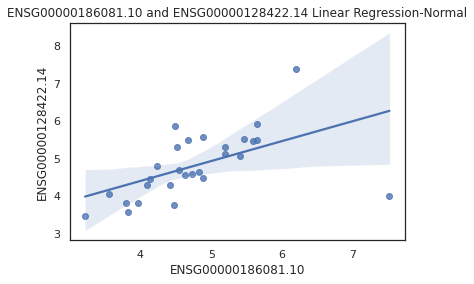

In [43]:

#filter based on results: Normal
datasubset_Results5 = o.loc[o["Clinical_Subtypes"] == "Normal"]

#select the columns
x = datasubset_Results5['ENSG00000186081.10']
y = datasubset_Results5['ENSG00000128422.14']

#Perform linear regression analysis and plot graph
o5= sp.stats.linregress(x, y,alternative="two-sided")
o5.rvalue
o5B= sns.regplot(datasubset_Results5, x="ENSG00000186081.10",y="ENSG00000128422.14")
o5B.set_title("ENSG00000186081.10 and ENSG00000128422.14 Linear Regression-Normal")
print(o5B)
print("R Value=",o5.rvalue)

In [44]:
print("RValue-Basal=",o1.rvalue)
print("RValue-LumA=",o2.rvalue)
print("RValue-LumB=",o3.rvalue)
print("RValue-HER2=",o4.rvalue)
print("RValue-Normal=",o5.rvalue)

RValue-Basal= 0.5544196989003722
RValue-LumA= 0.8914287604819622
RValue-LumB= 0.8974230320693612
RValue-HER2= 0.7362528192401565
RValue-Normal= 0.5350817650187477


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [46]:
### Create a subset of the data
subset_PCA = df.iloc[:,0:47]
subset_PCA.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [88]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

In [89]:
# Initiate a new scaler: we want the data to be on the same scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(subset_PCA)

# Apply the pattern
subset_scaled = scaler.transform(subset_PCA) 

In [90]:
### Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=25)

#Apply Transformation on the subset_reduced
pca.fit(subset_scaled)
data_reduce = pca.fit_transform(subset_scaled)



### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [72]:
explained_variance_ratio=pca.explained_variance_ratio_
explained_variance_ratio

array([0.42936951, 0.14609421, 0.06931306, 0.03436857, 0.03026934,
       0.0281323 , 0.0212249 , 0.01899898, 0.01572847, 0.01536696,
       0.01443049, 0.01215975, 0.01156339, 0.01087836, 0.01044785,
       0.00869543, 0.00856741, 0.00801427, 0.00748383, 0.00723202,
       0.00702308, 0.00650236, 0.0062914 , 0.0056897 , 0.00538441])

In [61]:
PCA1PCA2= 0.429369510+0.14609421
print("percentage of the variance=",PCA1PCA2*100)

percentage of the variance= 57.546372


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [58]:

#Create a dataframe using the transformed and reduced data
pc_df = pd.DataFrame(data=data_reduce)
pc_df

#Add Clinical Subtype to the dataframe
pc_df['Clinical_Subtypes'] = df['Clinical_Subtypes']

pc_df





,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical_Subtypes
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-4.054981,6.227401,1.458602,1.421975,1.311305,1.605043,-0.321331,-0.365449,0.442594,1.099888,...,-0.960204,0.467726,0.048400,0.467071,0.148066,0.109411,0.705191,-0.122287,-0.003568,Normal
641,0.697819,2.007934,1.387969,2.302343,1.055503,-0.011588,-0.451215,0.350735,0.337477,1.336361,...,-0.642795,0.210178,0.203870,0.415196,0.582681,0.238052,0.010782,0.232744,0.038406,Normal
642,-3.859061,6.468153,2.007192,1.025694,0.900630,1.443919,-0.293791,0.488818,0.750596,-0.254519,...,0.211408,0.409772,0.715591,0.827275,0.289570,-0.221828,0.277182,-0.509931,-0.227591,Normal
643,-2.690803,3.915308,4.485345,0.093599,0.497658,-1.334994,-1.062247,1.059165,0.787667,0.645511,...,0.295547,-0.253376,-0.159591,0.239230,0.206479,0.580015,0.020920,-0.641803,0.233898,Normal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

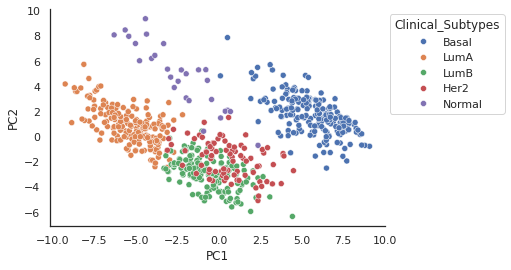

In [73]:
#plot using PC1 and PC2
p = sns.scatterplot(pc_df,x=0,y=1,hue="Clinical_Subtypes")

p.set_xlabel('PC1')
p.set_ylabel('PC2')
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [76]:
print("Yes, Because we can clearly see 4 clusters based on this scatter plot")
print("Although cluster HER2 and Lum B might be tricky to consider them as different clusters")

Yes, Because we can clearly see 4 clusters based on this scatter plot
Although cluster HER2 and Lum B might be tricky to consider them as different clusters


### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [64]:
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")


### What value of k did you use and why? [2 pt]

In [65]:
kmeans_labels = kmean_algo.fit_predict(pc_df.iloc[:, :25])

# Add K-means labels to the PCA-reduced DataFrame
pc_df['KMeans_Labels'] = kmeans_labels
pc_df


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Clinical_Subtypes,KMeans_Labels
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal,1
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal,1
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal,1
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal,1
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-4.054981,6.227401,1.458602,1.421975,1.311305,1.605043,-0.321331,-0.365449,0.442594,1.099888,...,0.467726,0.048400,0.467071,0.148066,0.109411,0.705191,-0.122287,-0.003568,Normal,2
641,0.697819,2.007934,1.387969,2.302343,1.055503,-0.011588,-0.451215,0.350735,0.337477,1.336361,...,0.210178,0.203870,0.415196,0.582681,0.238052,0.010782,0.232744,0.038406,Normal,4
642,-3.859061,6.468153,2.007192,1.025694,0.900630,1.443919,-0.293791,0.488818,0.750596,-0.254519,...,0.409772,0.715591,0.827275,0.289570,-0.221828,0.277182,-0.509931,-0.227591,Normal,2
643,-2.690803,3.915308,4.485345,0.093599,0.497658,-1.334994,-1.062247,1.059165,0.787667,0.645511,...,-0.253376,-0.159591,0.239230,0.206479,0.580015,0.020920,-0.641803,0.233898,Normal,2


### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**

In [66]:
pg=pc_df.loc[:,["Clinical_Subtypes","KMeans_Labels"]]
pg

,Clinical_Subtypes,KMeans_Labels
0,Basal,1
1,Basal,1
2,Basal,1
3,Basal,1
4,Basal,1
...,...,...
640,Normal,2
641,Normal,4
642,Normal,2
643,Normal,2


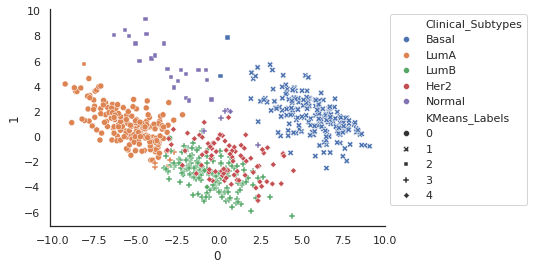

In [67]:
p = sns.scatterplot(pc_df,x=0,y=1,hue="Clinical_Subtypes",style="KMeans_Labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [79]:
print("Yes we are able to cluster patients based on clinical subtypes despite the small variation found and I guess it can be neglected since most of our clusters are able to differentaite the clinical subtype present in our dataset")

Yes we are able to cluster patients based on clinical subtypes despite the small variation found and I guess it can be neglected since most of our clusters are able to differentaite the clinical subtype present in our dataset
